# **Customer Churn Prediction**

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from sklearn.utils.class_weight import compute_sample_weight
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Loading Dataset

In [66]:
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
pd.set_option('display.max_columns', None)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Data Dictionary

* **CustomerID**: A unique ID that identifies each customer
* **Gender**: The customer’s gender: Male, Female
* **Senior Citizen**: Indicates if the customer is 65 or older: Yes, No
* **Partner**: Indicate if the customer has a partner: Yes, No
* **Dependents**: Indicates if the customer lives with any dependents: Yes, No
* **Tenure**: Indicates the total amount of months that the customer has been with the company
* **Phone Service**: Indicates if the customer subscribes to home phone service with the company: Yes, No
* **Multiple Lines**: Indicates if the customer subscribes to multiple telephone lines with the company: Yes, No
* **Internet Service**: Indicates if the customer subscribes to Internet service with the company: No, DSL, Fiber Optic, Cable.
* **Online Security**: Indicates if the customer subscribes to an additional online security service provided by the company: Yes, No
* **Online Backup**: Indicates if the customer subscribes to an additional online backup service provided by the company: Yes, No
* **Device Protection**: Indicates if the customer subscribes to an additional device protection plan for their Internet equipment provided by the company: Yes, No
* **Tech Support**: Indicates if the customer subscribes to an additional technical support plan from the company with reduced wait times: Yes, No
* **Streaming TV**: Indicates if the customer uses their Internet service to stream television programing from a third party provider: Yes, No. The company does not charge an additional fee for this service.
* **Streaming Movies**: Indicates if the customer uses their Internet service to stream movies from a third party provider: Yes, No. The company does not charge an additional fee for this service.
* **Contract**: Indicates the customer’s current contract type: Month-to-Month, One Year, Two Year.
* **Paperless Billing**: Indicates if the customer has chosen paperless billing: Yes, No
* **Payment Method**: Indicates how the customer pays their bill: Bank Withdrawal, Credit Card, Mailed Check
* **Monthly Charge**: Indicates the customer’s current total monthly charge for all their services from the company.
* **Total Charges**: Indicates the customer’s total charges, calculated to the end of the quarter specified above.
* **Churn Label**: Yes = the customer left the company this quarter. No = the customer remained with the company.


In [67]:
# Making Column Names Uniform

df.columns = df.columns.str.lower().str.replace(" ", "_")

In [68]:
df.drop('customerid', axis=1, inplace=True)

# Data Cleaning

In [69]:
df.shape

(7043, 20)

In [70]:
# Missing Vaues
df.isna().sum()

,0
gender,0
seniorcitizen,0
partner,0
dependents,0
tenure,0
phoneservice,0
multiplelines,0
internetservice,0
onlinesecurity,0
onlinebackup,0


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   seniorcitizen     7043 non-null   int64  
 2   partner           7043 non-null   object 
 3   dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   phoneservice      7043 non-null   object 
 6   multiplelines     7043 non-null   object 
 7   internetservice   7043 non-null   object 
 8   onlinesecurity    7043 non-null   object 
 9   onlinebackup      7043 non-null   object 
 10  deviceprotection  7043 non-null   object 
 11  techsupport       7043 non-null   object 
 12  streamingtv       7043 non-null   object 
 13  streamingmovies   7043 non-null   object 
 14  contract          7043 non-null   object 
 15  paperlessbilling  7043 non-null   object 
 16  paymentmethod     7043 non-null   object 


In [72]:
# Converting total charges column to numeric data type

# Replace empty strings or spaces with NaN
df['totalcharges'] = df['totalcharges'].replace(' ', np.nan)

# Convert to float, ignoring errors
df['totalcharges'] = pd.to_numeric(df['totalcharges'], errors='coerce')

In [73]:
# Missing Vaues
df.isna().sum()

,0
gender,0
seniorcitizen,0
partner,0
dependents,0
tenure,0
phoneservice,0
multiplelines,0
internetservice,0
onlinesecurity,0
onlinebackup,0


In [74]:
# Finding Patterns in NA values
df[df['totalcharges'].isna()].describe()

,seniorcitizen,tenure,monthlycharges,totalcharges
count,11.0,11.0,11.000000,0.0
mean,0.0,0.0,41.418182,NaN
std,0.0,0.0,23.831484,NaN
min,0.0,0.0,19.700000,NaN
25%,0.0,0.0,20.125000,NaN
50%,0.0,0.0,25.750000,NaN
75%,0.0,0.0,58.975000,NaN
max,0.0,0.0,80.850000,NaN


In [75]:
df[df['totalcharges'].isna()]

,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


We can see all of the customers with NaN's in Total Charges are new customer's as their tenure is 0, replacing these NaN's with 0 is the best way forward.

In [76]:
df['totalcharges'] = df['totalcharges'].fillna(0)

# Exploratory Data Analysis

In [77]:
df.describe(include='all')

,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
count,7043,7043.000000,7043,7043,7043.000000,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043.000000,7043.000000,7043
unique,2,NaN,2,2,NaN,2,3,3,3,3,3,3,3,3,3,2,4,NaN,NaN,2
top,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,NaN,No
freq,3555,NaN,3641,4933,NaN,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,NaN,NaN,5174
mean,NaN,0.162147,NaN,NaN,32.371149,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,2279.734304,NaN
std,NaN,0.368612,NaN,NaN,24.559481,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,2266.794470,NaN
min,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,0.000000,NaN
25%,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,398.550000,NaN
50%,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,1394.550000,NaN
75%,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,3786.600000,NaN


In [78]:
# Unique values in categorical columns

for col in df.select_dtypes(include=['object']).columns:
    print(f"Unique values in '{col}':")
    print(df[col].unique())

Unique values in 'gender':
['Female' 'Male']
Unique values in 'partner':
['Yes' 'No']
Unique values in 'dependents':
['No' 'Yes']
Unique values in 'phoneservice':
['No' 'Yes']
Unique values in 'multiplelines':
['No phone service' 'No' 'Yes']
Unique values in 'internetservice':
['DSL' 'Fiber optic' 'No']
Unique values in 'onlinesecurity':
['No' 'Yes' 'No internet service']
Unique values in 'onlinebackup':
['Yes' 'No' 'No internet service']
Unique values in 'deviceprotection':
['No' 'Yes' 'No internet service']
Unique values in 'techsupport':
['No' 'Yes' 'No internet service']
Unique values in 'streamingtv':
['No' 'Yes' 'No internet service']
Unique values in 'streamingmovies':
['No' 'Yes' 'No internet service']
Unique values in 'contract':
['Month-to-month' 'One year' 'Two year']
Unique values in 'paperlessbilling':
['Yes' 'No']
Unique values in 'paymentmethod':
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Unique values in 'churn':
['No' 'Ye

<ipython-input-79-4794f11541c9>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='churn', palette='coolwarm')


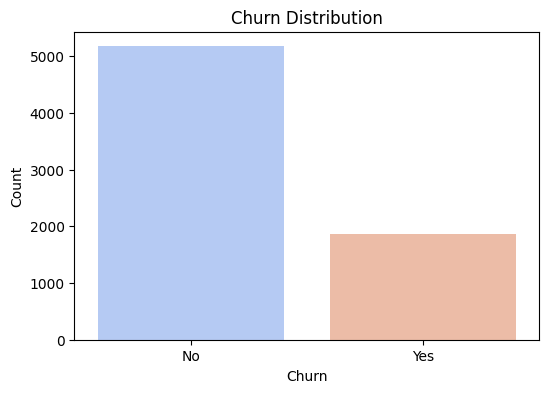

In [79]:
# Plot the count of each churn category
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='churn', palette='coolwarm')

# Add labels and title
plt.xlabel("Churn")
plt.ylabel("Count")
plt.title("Churn Distribution")
plt.show()

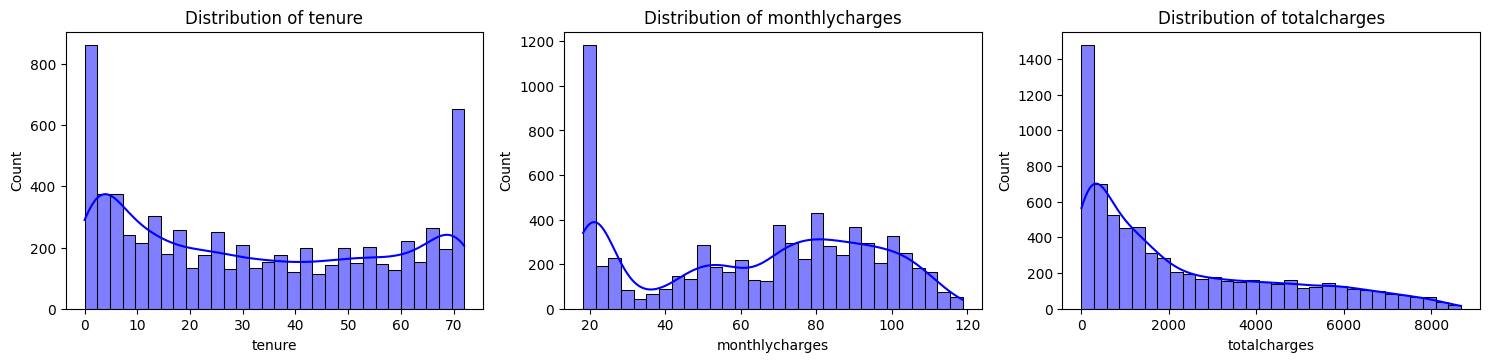

In [80]:
# Plotting data distribution for numeric columns
col_num = ['tenure', 'monthlycharges', 'totalcharges']


plt.figure(figsize=(15, 10))
for i, col in enumerate(col_num, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[col], bins=30, kde=True, color='blue')
    plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

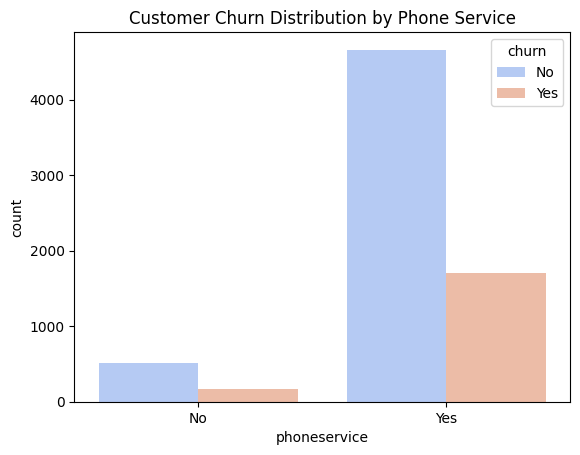

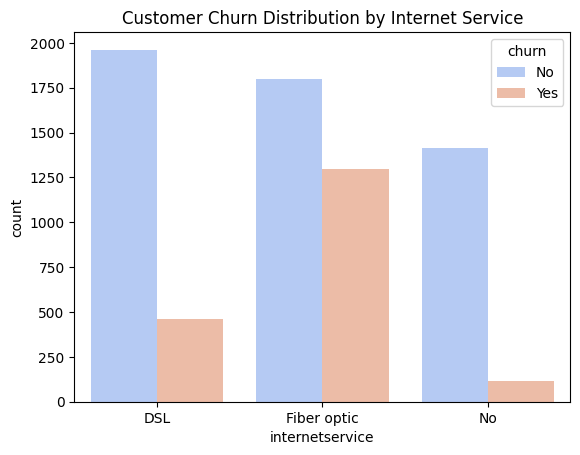

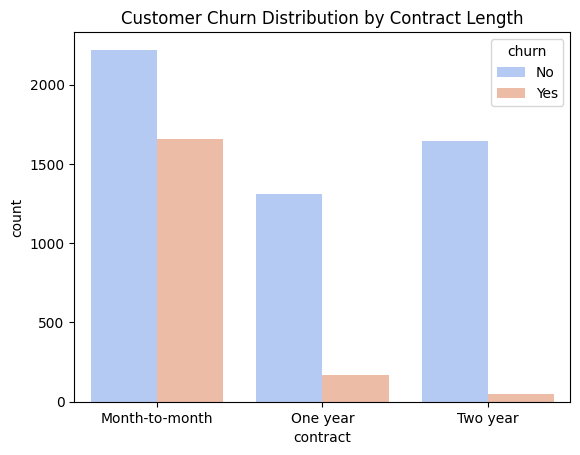

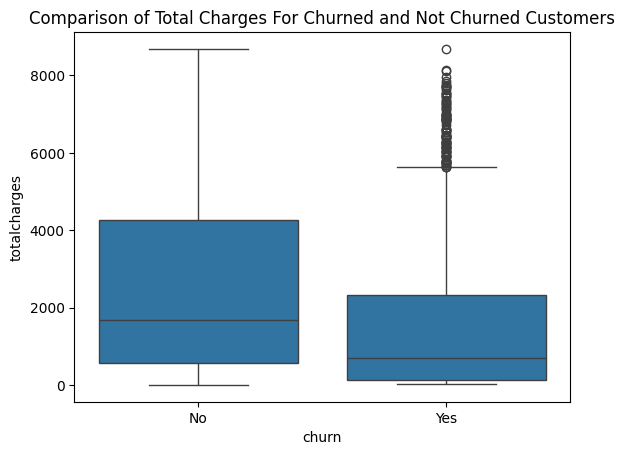

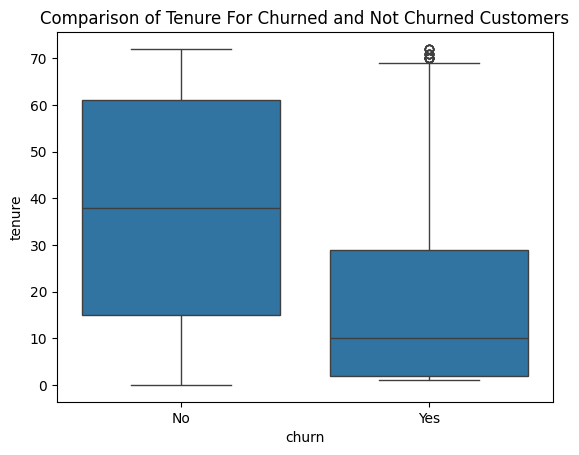

In [81]:
# Phone Service and Churn
sns.countplot(x="phoneservice", hue="churn", data=df, palette = "coolwarm")
plt.title("Customer Churn Distribution by Phone Service")
plt.show()

# Intenet Service and Churn
sns.countplot(x="internetservice", hue="churn", data=df, palette = "coolwarm")
plt.title("Customer Churn Distribution by Internet Service")
plt.show()


# Contract Length and Churn
sns.countplot(x="contract", hue="churn", data=df, palette = "coolwarm")
plt.title("Customer Churn Distribution by Contract Length")
plt.show()

# Total Charges and Churn
sns.boxplot(x="churn", y="totalcharges", data=df)
plt.title("Comparison of Total Charges For Churned and Not Churned Customers")
plt.show()

# Tenure and Churn
sns.boxplot(x="churn", y="tenure", data=df)
plt.title("Comparison of Tenure For Churned and Not Churned Customers")
plt.show()

In [82]:
df['spend_per_month'] = round(df['totalcharges'] / df['tenure'].replace(0, 1),2)

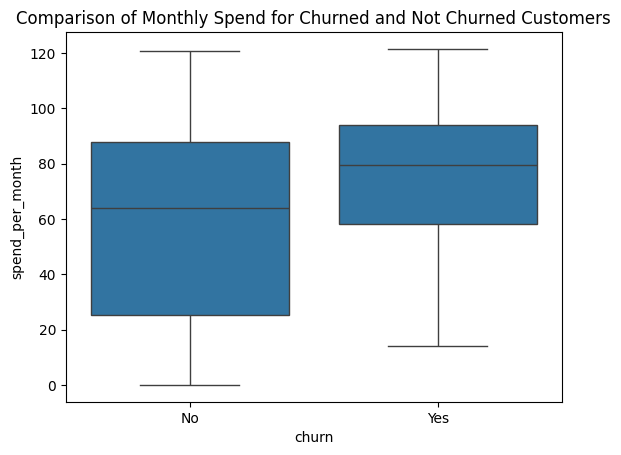

In [83]:
# Spend per mont and Churn
sns.boxplot(x="churn", y="spend_per_month", data=df)
plt.title("Comparison of Monthly Spend for Churned and Not Churned Customers")
plt.show()

In [84]:
# Mapping Yes and No for churn to Numeric values

df['churn'] = df['churn'].map({'Yes': 1, 'No': 0})

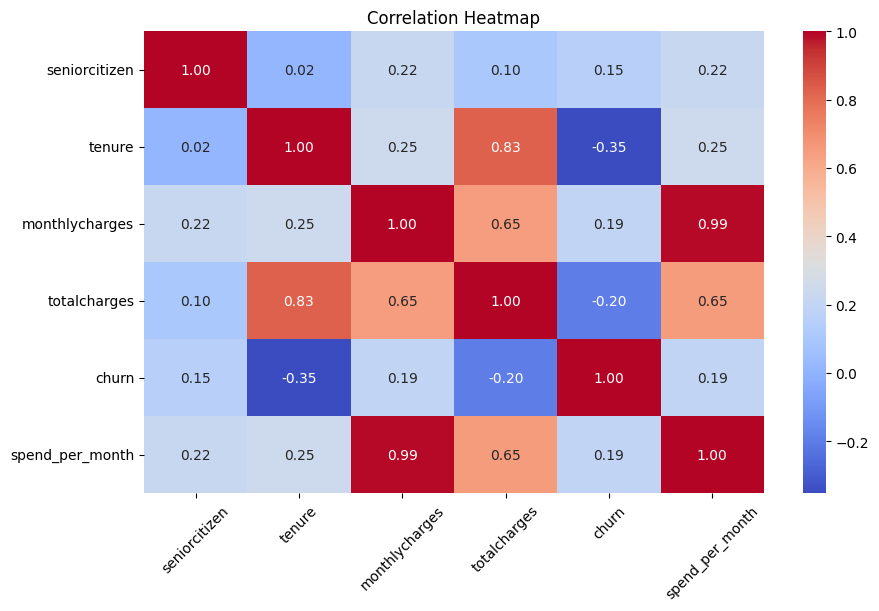

In [85]:
#Correlation between Numeric columns
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only = True), annot=True, cmap="coolwarm", fmt=".2f")
plt.xticks(rotation = 45)
plt.title("Correlation Heatmap")
plt.show()

# Data Preparation

In [86]:
cat_cols = df.select_dtypes(include=['object']).columns
df_transformed = pd.get_dummies(df, columns=cat_cols, drop_first=True)

Because our data is imbalanced and has more non-churners than churned customers we will use SMOTE to synthetically generate data for churned customers such that we have a more balanced dataset.

In [87]:
X = df_transformed.drop(columns=['churn', 'monthlycharges']) # Dropping monthly charges as that is similar to spend_per_month
y = df_transformed['churn']

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

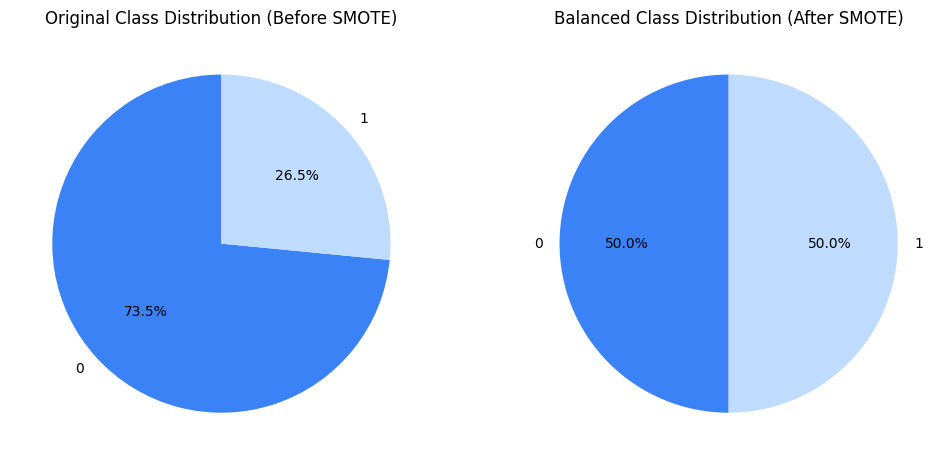

In [88]:
from collections import Counter

# Before SMOTE (Original class distribution)
original_class_dist = Counter(y)

# After SMOTE (Balanced class distribution)
smote_class_dist = Counter(y_resampled)

# Plotting the original class distribution
plt.figure(figsize=(12, 6))

# Subplot for original class distribution
plt.subplot(1, 2, 1)
plt.pie(original_class_dist.values(), labels=original_class_dist.keys(), autopct='%1.1f%%', startangle=90, colors=['#3B82F6', '#BFDBFE'])
plt.title("Original Class Distribution (Before SMOTE)")

# Subplot for balanced class distribution
plt.subplot(1, 2, 2)
plt.pie(smote_class_dist.values(), labels=smote_class_dist.keys(), autopct='%1.1f%%', startangle=90, colors=['#3B82F6', '#BFDBFE'])
plt.title("Balanced Class Distribution (After SMOTE)")

# Show the plot
plt.show()

In [89]:
X_resampled.shape

(10348, 30)

# Modeling

In [90]:
# Splitting the data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, stratify=y_resampled, random_state=0)

## Logistic Regression

In [91]:
# Standardize features for Logistic Regression
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [92]:
# Initialize Logistic Regression model with default parameters
logreg = LogisticRegression()

# Param grid for lbfgs which supports only l2 (Ridge) penalty
param_grid_lbfgs = {
    'max_iter': [1000, 1500, 2000],
    'penalty': ['l2'],  # Only 'l2' penalty
    'C': [0.001, 0.005, 0.01, 0.1, 1, 10],
    'solver': ['lbfgs']
}

# Param grid for saga which supports both l1 (lasso) and l2 (Ridge) penalties
param_grid_saga = {
    'max_iter': [1000, 1500, 2000],
    'penalty': ['l1', 'l2'],  # Both 'l1' and 'l2' penalties
    'C': [0.001, 0.005, 0.01, 0.1, 1, 10],
    'solver': ['saga', 'liblinear']
}

# GridSearchCV for 'lbfgs' solver
lr_grid_lbfgs = GridSearchCV(logreg, param_grid=param_grid_lbfgs, cv=5, scoring='accuracy', n_jobs=-1, return_train_score=True)
lr_grid_lbfgs.fit(X_train_scaled, y_train)

# GridSearchCV for 'saga' solver
lr_grid_saga = GridSearchCV(logreg, param_grid=param_grid_saga, cv=5, scoring='accuracy', n_jobs=-1, return_train_score=True)
lr_grid_saga.fit(X_train_scaled, y_train)

# Output best hyperparameters for both grids
print(f"Best Hyperparameters (lbfgs): {lr_grid_lbfgs.best_params_}")
print(f"Best Hyperparameters (saga): {lr_grid_saga.best_params_}")


Best Hyperparameters (lbfgs): {'C': 10, 'max_iter': 1000, 'penalty': 'l2', 'solver': 'lbfgs'}
Best Hyperparameters (saga): {'C': 10, 'max_iter': 1000, 'penalty': 'l1', 'solver': 'saga'}


In [93]:
#Best Models
lr_best_model_lbfgs = lr_grid_lbfgs.best_estimator_
lr_best_model_saga = lr_grid_saga.best_estimator_

In [96]:
# lbfgs model Predictions on the train set
y_train_pred_lbfgs = lr_best_model_lbfgs.predict(X_train_scaled)

# Model accuracy
accuracy = accuracy_score(y_train, y_train_pred_lbfgs)
print(f"Model Accuracy Train Set: {accuracy:.4f}")

# Classification report (Precision, Recall, F1-score)
print("Classification Report:")
print(classification_report(y_train, y_train_pred_lbfgs))

Model Accuracy Train Set: 0.8225
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.82      0.82      4139
           1       0.82      0.83      0.82      4139

    accuracy                           0.82      8278
   macro avg       0.82      0.82      0.82      8278
weighted avg       0.82      0.82      0.82      8278



In [97]:
# lbfgs model Predictions on the test set
y_test_pred_lbfgs = lr_best_model_lbfgs.predict(X_test)

# Model accuracy
accuracy = accuracy_score(y_test, y_test_pred_lbfgs)
print(f"Model Accuracy Test Set: {accuracy:.4f}")

# Classification report (Precision, Recall, F1-score)
print("Classification Report:")
print(classification_report(y_test, y_test_pred_lbfgs))

Model Accuracy Test Set: 0.3802
Classification Report:
              precision    recall  f1-score   support

           0       0.19      0.07      0.10      1035
           1       0.43      0.69      0.53      1035

    accuracy                           0.38      2070
   macro avg       0.31      0.38      0.32      2070
weighted avg       0.31      0.38      0.32      2070



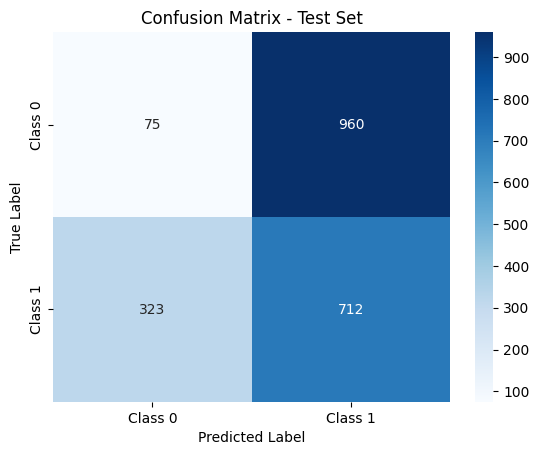

In [99]:
# Confusion matrix
cm = confusion_matrix(y_test, y_test_pred_lbfgs)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Test Set")
plt.show()

In [101]:
# saga model predictions on the train set
y_train_pred_saga = lr_best_model_saga.predict(X_train_scaled)

# Model accuracy
accuracy = accuracy_score(y_train, y_train_pred_saga)
print(f"Model Accuracy Train Set: {accuracy:.4f}")

# Classification report (Precision, Recall, F1-score)
print("Classification Report:")
print(classification_report(y_train, y_train_pred_saga))

Model Accuracy Train Set: 0.8229
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.82      0.82      4139
           1       0.82      0.83      0.82      4139

    accuracy                           0.82      8278
   macro avg       0.82      0.82      0.82      8278
weighted avg       0.82      0.82      0.82      8278



In [102]:
# Make predictions using saga model
y_test_pred_saga = lr_best_model_saga.predict(X_test)

# Model accuracy
accuracy = accuracy_score(y_test, y_test_pred_saga)
print(f"Model Accuracy Test Set: {accuracy:.4f}")

# Classification report (Precision, Recall, F1-score)
print("Classification Report:")
print(classification_report(y_test, y_test_pred_saga))

Model Accuracy Test Set: 0.3802
Classification Report:
              precision    recall  f1-score   support

           0       0.19      0.07      0.10      1035
           1       0.43      0.69      0.53      1035

    accuracy                           0.38      2070
   macro avg       0.31      0.38      0.32      2070
weighted avg       0.31      0.38      0.32      2070



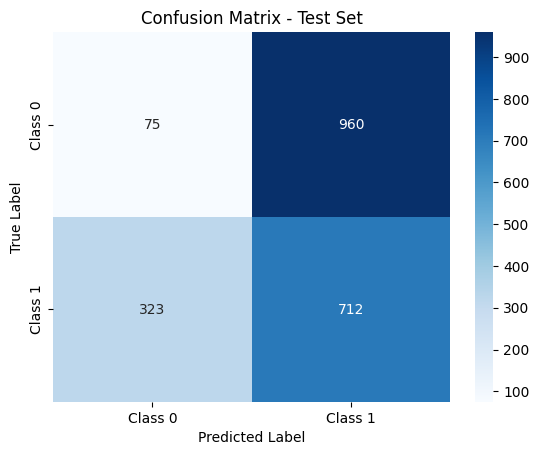

In [103]:
# Confusion matrix
cm = confusion_matrix(y_test, y_test_pred_saga)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Test Set")
plt.show()

The model struggles to make accurate predictions on unseen data, as evidenced by a high number of False Positives and nearly 30% of actual churned customers being misclassified as non-churners. Both issues pose significant risks to the business—false positives may lead to unnecessary retention efforts, while false negatives result in missed opportunities to prevent churn. To improve generalization and enhance model performance, we will adjust hyperparameters such as C to increase regularization and reduce overfitting.

In [104]:
# Initialize Logistic Regression model with default parameters
logreg = LogisticRegression()

# Param grid for lbfgs which supports only l2 (Ridge) penalty
param_grid_lbfgs = {
    'max_iter': [1000, 1500, 2000],
    'penalty': ['l2'],  # Only 'l2' penalty
    'C': [0.001, 0.005, 0.01, 0.1, 1, 10, 100],
    'solver': ['lbfgs']
}

# Param grid for saga which supports both l1 (lasso) and l2 (Ridge) penalties
param_grid_saga = {
    'max_iter': [1000, 1500, 2000],
    'penalty': ['l1', 'l2'],  # Both 'l1' and 'l2' penalties
    'C': [0.001, 0.005, 0.01, 0.1, 1, 10, 100],
    'solver': ['saga', 'liblinear']
}

# GridSearchCV for 'lbfgs' solver
lr_grid_lbfgs_1 = GridSearchCV(logreg, param_grid=param_grid_lbfgs, cv=5, scoring='accuracy', n_jobs=-1, return_train_score=True)
lr_grid_lbfgs_1.fit(X_train_scaled, y_train)

# GridSearchCV for 'saga' solver
lr_grid_saga_1 = GridSearchCV(logreg, param_grid=param_grid_saga, cv=5, scoring='accuracy', n_jobs=-1, return_train_score=True)
lr_grid_saga_1.fit(X_train_scaled, y_train)

# Output best hyperparameters for both grids
print(f"Best Hyperparameters (lbfgs): {lr_grid_lbfgs_1.best_params_}")
print(f"Best Hyperparameters (saga): {lr_grid_saga_1.best_params_}")

Best Hyperparameters (lbfgs): {'C': 100, 'max_iter': 1000, 'penalty': 'l2', 'solver': 'lbfgs'}
Best Hyperparameters (saga): {'C': 10, 'max_iter': 1000, 'penalty': 'l1', 'solver': 'saga'}


In [105]:
#Best Models
lr_best_model_lbfgs_1 = lr_grid_lbfgs_1.best_estimator_
lr_best_model_saga_1 = lr_grid_saga_1.best_estimator_

In [106]:
# lbfgs model Predictions on the train set
y_train_pred_lbfgs = lr_best_model_lbfgs_1.predict(X_train_scaled)

# Model accuracy
accuracy = accuracy_score(y_train, y_train_pred_lbfgs)
print(f"Model Accuracy Train Set: {accuracy:.4f}")

# Classification report (Precision, Recall, F1-score)
print("Classification Report:")
print(classification_report(y_train, y_train_pred_lbfgs))

Model Accuracy Train Set: 0.8227
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.82      0.82      4139
           1       0.82      0.83      0.82      4139

    accuracy                           0.82      8278
   macro avg       0.82      0.82      0.82      8278
weighted avg       0.82      0.82      0.82      8278



In [107]:
# lbfgs model Predictions on the test set
y_test_pred_lbfgs = lr_best_model_lbfgs_1.predict(X_test)

# Model accuracy
accuracy = accuracy_score(y_test, y_test_pred_lbfgs)
print(f"Model Accuracy Test Set: {accuracy:.4f}")

# Classification report (Precision, Recall, F1-score)
print("Classification Report:")
print(classification_report(y_test, y_test_pred_lbfgs))

Model Accuracy Test Set: 0.3802
Classification Report:
              precision    recall  f1-score   support

           0       0.19      0.07      0.10      1035
           1       0.43      0.69      0.53      1035

    accuracy                           0.38      2070
   macro avg       0.31      0.38      0.32      2070
weighted avg       0.31      0.38      0.32      2070



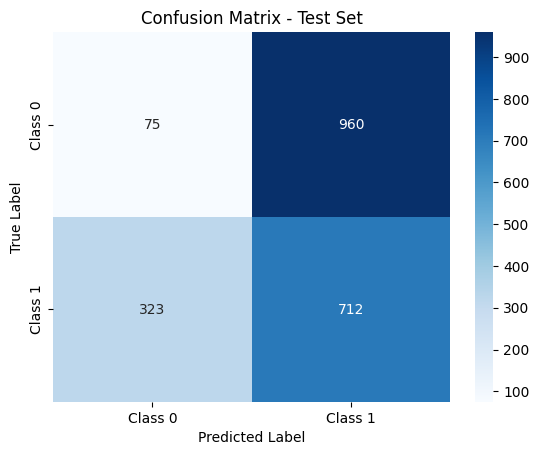

In [108]:
# Confusion matrix
cm = confusion_matrix(y_test, y_test_pred_lbfgs)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Test Set")
plt.show()

In [109]:
# saga model predictions on the train set
y_train_pred_saga = lr_best_model_saga_1.predict(X_train_scaled)

# Model accuracy
accuracy = accuracy_score(y_train, y_train_pred_saga)
print(f"Model Accuracy Train Set: {accuracy:.4f}")

# Classification report (Precision, Recall, F1-score)
print("Classification Report:")
print(classification_report(y_train, y_train_pred_saga))

Model Accuracy Train Set: 0.8229
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.82      0.82      4139
           1       0.82      0.83      0.82      4139

    accuracy                           0.82      8278
   macro avg       0.82      0.82      0.82      8278
weighted avg       0.82      0.82      0.82      8278



In [110]:
# Make predictions using saga model
y_test_pred_saga = lr_best_model_saga_1.predict(X_test)

# Model accuracy
accuracy = accuracy_score(y_test, y_test_pred_saga)
print(f"Model Accuracy Test Set: {accuracy:.4f}")

# Classification report (Precision, Recall, F1-score)
print("Classification Report:")
print(classification_report(y_test, y_test_pred_saga))

Model Accuracy Test Set: 0.3802
Classification Report:
              precision    recall  f1-score   support

           0       0.19      0.07      0.10      1035
           1       0.43      0.69      0.53      1035

    accuracy                           0.38      2070
   macro avg       0.31      0.38      0.32      2070
weighted avg       0.31      0.38      0.32      2070



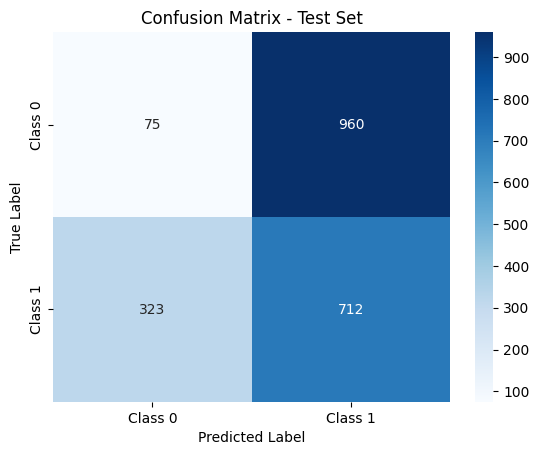

In [111]:
# Confusion matrix
cm = confusion_matrix(y_test, y_test_pred_saga)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Test Set")
plt.show()

We don't see much difference in model performance despite tuning the hyper parameters, this might mean that logistic regression is not the right model for our data and that our data might not be linearly separable. We will now explore Tree based models which work better on data with complex relationships.

## Decision Tree

In [40]:
# Defining a baseline Decision Tree model
dt_model = DecisionTreeClassifier()

dt_model.fit(X_train, y_train)

# Make predictions
y_train_pred_dt1 = dt_model.predict(X_train)
y_test_pred_dt1 = dt_model.predict(X_test)

# Evaluate the model
print("Training Accuracy:", accuracy_score(y_train, y_train_pred_dt1))
print("Classification Report (Train):\n", classification_report(y_train, y_train_pred_dt1))
print("Test Accuracy:", accuracy_score(y_test, y_test_pred_dt1))
print("\nClassification Report (Test):\n", classification_report(y_test, y_test_pred_dt1))

Training Accuracy: 0.9984295723604736
Classification Report (Train):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      4139
           1       1.00      1.00      1.00      4139

    accuracy                           1.00      8278
   macro avg       1.00      1.00      1.00      8278
weighted avg       1.00      1.00      1.00      8278

Test Accuracy: 0.8014492753623188

Classification Report (Test):
               precision    recall  f1-score   support

           0       0.80      0.80      0.80      1035
           1       0.80      0.80      0.80      1035

    accuracy                           0.80      2070
   macro avg       0.80      0.80      0.80      2070
weighted avg       0.80      0.80      0.80      2070



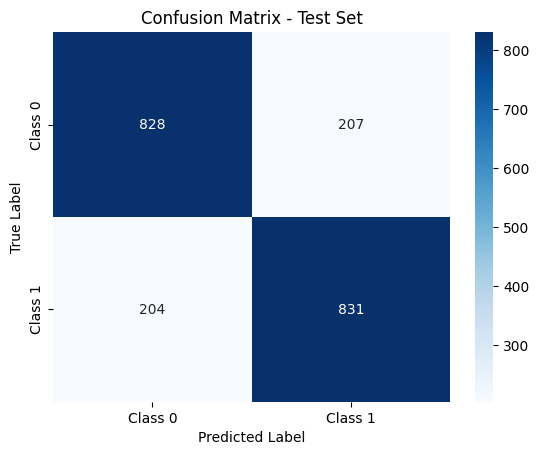

In [41]:
# Confusion matrix
cm = confusion_matrix(y_test, y_test_pred_dt1)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Test Set")
plt.show()

The model is essentially memorizing patterns in the training data, resulting in an almost perfect accuracy on the training set. However, the performance drops by nearly 20% on the test set. While the test set performance is still decent, this significant gap indicates clear overfitting. Next, we will tune various hyperparameters to improve generalization and ensure the model performs well on unseen data.

In [42]:
# Defining hyperparameter grid for grid search
param_grid = {
    'max_depth': [3, 5, 10],
    'min_samples_split': [10, 20, 50],
    'min_samples_leaf': [5, 10, 20],
    'ccp_alpha': np.linspace(0.0001, 0.01, 10),
    'criterion': ['gini', 'entropy']
}

# Perform grid search
decision_tree_grid = GridSearchCV(DecisionTreeClassifier(), param_grid=param_grid,
                    cv=5, scoring='accuracy', return_train_score=True)
decision_tree_grid.fit(X_train, y_train)

# Print best parameters
print("Best Parameters:", decision_tree_grid.best_params_)

Best Parameters: {'ccp_alpha': np.float64(0.0001), 'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 20, 'min_samples_split': 50}


In [43]:
# Best model
best_model_decision_tree = decision_tree_grid.best_estimator_

# Make predictions
y_train_pred_dt2 = best_model_decision_tree.predict(X_train)
y_test_pred_dt2 = best_model_decision_tree.predict(X_test)

# Evaluate the model
print("Training Accuracy:", accuracy_score(y_train, y_train_pred_dt2))
print("Classification Report (Train):\n", classification_report(y_train, y_train_pred_dt2))
print("Test Accuracy:", accuracy_score(y_test, y_test_pred_dt2))
print("\nClassification Report (Test):\n", classification_report(y_test, y_test_pred_dt2))

Training Accuracy: 0.8401787871466537
Classification Report (Train):
               precision    recall  f1-score   support

           0       0.83      0.85      0.84      4139
           1       0.85      0.83      0.84      4139

    accuracy                           0.84      8278
   macro avg       0.84      0.84      0.84      8278
weighted avg       0.84      0.84      0.84      8278

Test Accuracy: 0.8202898550724638

Classification Report (Test):
               precision    recall  f1-score   support

           0       0.81      0.84      0.82      1035
           1       0.83      0.80      0.82      1035

    accuracy                           0.82      2070
   macro avg       0.82      0.82      0.82      2070
weighted avg       0.82      0.82      0.82      2070



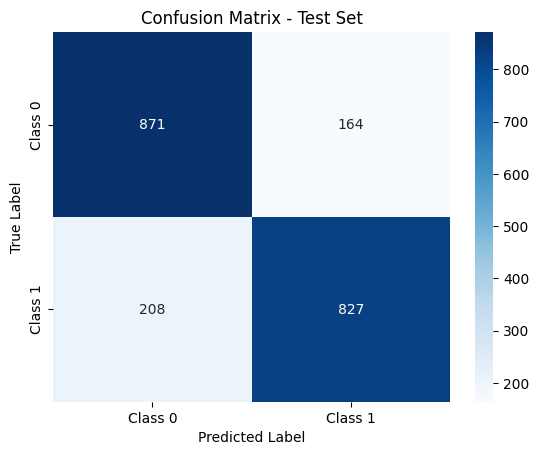

In [44]:
# Confusion matrix
cm = confusion_matrix(y_test, y_test_pred_dt2)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Test Set")
plt.show()

We've observed a clear improvement in performance after adjusting the hyperparameters, with training and test accuracy now closely aligned. Additionally, the model successfully classifies churning and non-churning customers with 80% and 83% accuracy, respectively. Next, we'll explore whether further hyperparameter tuning can enhance the model’s performance.

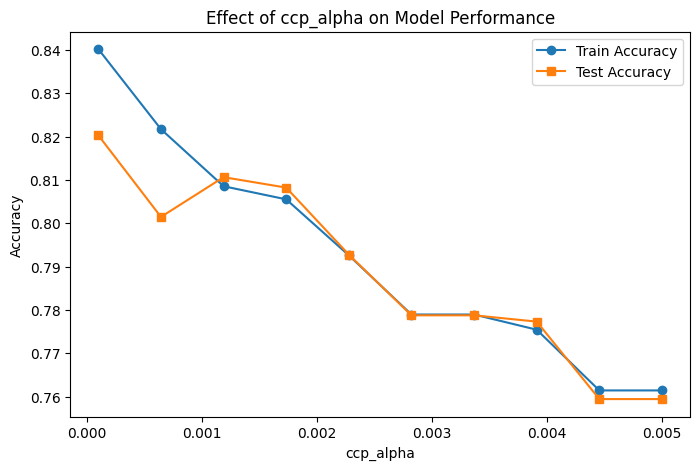

In [45]:
# Defining the range of ccp_alpha values to test
ccp_alphas = np.linspace(0.0001, 0.005, 10)  # Small increments for fine-tuning

train_accuracies = []
test_accuracies = []

for alpha in ccp_alphas:
    # Train a decision tree with the current ccp_alpha
    dt = DecisionTreeClassifier(
        criterion='gini',
        max_depth=10,
        min_samples_leaf=20,
        min_samples_split=50,
        ccp_alpha=alpha,
    )
    dt.fit(X_train, y_train)

    # Compute accuracy for training and test sets
    train_acc = accuracy_score(y_train, dt.predict(X_train))
    test_acc = accuracy_score(y_test, dt.predict(X_test))

    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)

# Plot accuracy vs. ccp_alpha
plt.figure(figsize=(8, 5))
plt.plot(ccp_alphas, train_accuracies, marker='o', label="Train Accuracy")
plt.plot(ccp_alphas, test_accuracies, marker='s', label="Test Accuracy")
plt.xlabel("ccp_alpha")
plt.ylabel("Accuracy")
plt.title("Effect of ccp_alpha on Model Performance")
plt.legend()
plt.show()


The graph shows that very low ccp_alpha values lead to overfitting, while higher values cause underfitting. The optimal range for balancing bias and variance is around 0.001 - 0.002, where train and test accuracy are closely aligned. Choosing ccp_alpha = 0.0015 ensures better generalization without excessive pruning.

In [46]:
# Defining our final Decision Tree model
dt_final = DecisionTreeClassifier(
        criterion='gini',
        max_depth=10,
        min_samples_leaf=20,
        min_samples_split=50,
        ccp_alpha=0.0015,
    )

dt_final.fit(X_train, y_train)

# Make predictions
y_train_pred_dt_final = dt_final.predict(X_train)
y_test_pred_dt_final = dt_final.predict(X_test)

# Evaluate the model
print("Training Accuracy:", accuracy_score(y_train, y_train_pred_dt_final))
print("Classification Report (Train):\n", classification_report(y_train, y_train_pred_dt_final))
print("Test Accuracy:", accuracy_score(y_test, y_test_pred_dt_final))
print("\nClassification Report (Test):\n", classification_report(y_test, y_test_pred_dt_final))

Training Accuracy: 0.8055085769509543
Classification Report (Train):
               precision    recall  f1-score   support

           0       0.80      0.81      0.81      4139
           1       0.81      0.80      0.80      4139

    accuracy                           0.81      8278
   macro avg       0.81      0.81      0.81      8278
weighted avg       0.81      0.81      0.81      8278

Test Accuracy: 0.8082125603864734

Classification Report (Test):
               precision    recall  f1-score   support

           0       0.80      0.83      0.81      1035
           1       0.82      0.79      0.80      1035

    accuracy                           0.81      2070
   macro avg       0.81      0.81      0.81      2070
weighted avg       0.81      0.81      0.81      2070



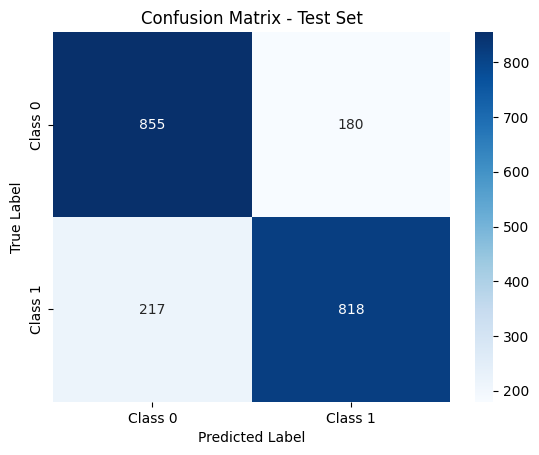

In [47]:
# Confusion matrix
cm = confusion_matrix(y_test, y_test_pred_dt_final)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Test Set")
plt.show()

This model achieves very close train and test accuracy (81%), indicating improved generalization. While there is a slight drop in all metrics compared to previous models, it reduces overfitting. Since this is a churn prediction task, recall is crucial - 79% of churned customers (positives) are correctly identified, which is acceptable given that some false positives are tolerable. This model balances precision and recall better, making it a more reliable choice for churn prediction.

## Random Forest

Decision trees tend to have high variance, meaning a single tree may struggle to capture complex relationships in the data. Ensemble methods like Random Forest, which aggregates the results of multiple trees, can help reduce variance and improve model stability.

In [48]:
rf_model = RandomForestClassifier(n_estimators=100)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_train = rf_model.predict(X_train)
y_pred_test = rf_model.predict(X_test)

# Evaluate performance
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

print(f"Training Accuracy: {train_accuracy:.4f}")
print("\nClassification Report (Train Set):")
print(classification_report(y_train, y_pred_train))
print(f"Test Accuracy: {test_accuracy:.4f}")
print("\nClassification Report (Test Set):")
print(classification_report(y_test, y_pred_test))

Training Accuracy: 0.9984

Classification Report (Train Set):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4139
           1       1.00      1.00      1.00      4139

    accuracy                           1.00      8278
   macro avg       1.00      1.00      1.00      8278
weighted avg       1.00      1.00      1.00      8278

Test Accuracy: 0.8498

Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.84      0.86      0.85      1035
           1       0.85      0.84      0.85      1035

    accuracy                           0.85      2070
   macro avg       0.85      0.85      0.85      2070
weighted avg       0.85      0.85      0.85      2070



The model is clearly overfitting and memorizing the training data, we will now tune hyper parameters to ensure the model generalises well on unseen data.

In [49]:
rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 15],
    'min_samples_split': [20, 50, 100],
    'min_samples_leaf': [10, 20, 30],
    'max_features': ['sqrt', 'log2'],
    'ccp_alpha': [0.0002, 0.001, 0.01]
}

random_forest_grid = GridSearchCV(RandomForestClassifier(), param_grid=rf_param_grid, cv=5, scoring='accuracy', return_train_score=True)
random_forest_grid.fit(X_train, y_train)

# Print best parameters
print("Best Parameters:", random_forest_grid.best_params_)

Best Parameters: {'ccp_alpha': 0.0002, 'max_depth': 15, 'max_features': 'sqrt', 'min_samples_leaf': 10, 'min_samples_split': 20, 'n_estimators': 100}


In [50]:
# Best model
best_model_random_forest = random_forest_grid.best_estimator_

# Make predictions
y_train_pred_rf = best_model_random_forest.predict(X_train)
y_test_pred_rf = best_model_random_forest.predict(X_test)

# Evaluate the model
print("Training Accuracy:", accuracy_score(y_train, y_train_pred_rf))
print("Classification Report (Train):\n", classification_report(y_train, y_train_pred_rf))
print("Test Accuracy:", accuracy_score(y_test, y_test_pred_rf))
print("\nClassification Report (Test):\n", classification_report(y_test, y_test_pred_rf))

Training Accuracy: 0.8598695337037932
Classification Report (Train):
               precision    recall  f1-score   support

           0       0.87      0.85      0.86      4139
           1       0.85      0.87      0.86      4139

    accuracy                           0.86      8278
   macro avg       0.86      0.86      0.86      8278
weighted avg       0.86      0.86      0.86      8278

Test Accuracy: 0.8270531400966183

Classification Report (Test):
               precision    recall  f1-score   support

           0       0.83      0.82      0.83      1035
           1       0.82      0.83      0.83      1035

    accuracy                           0.83      2070
   macro avg       0.83      0.83      0.83      2070
weighted avg       0.83      0.83      0.83      2070



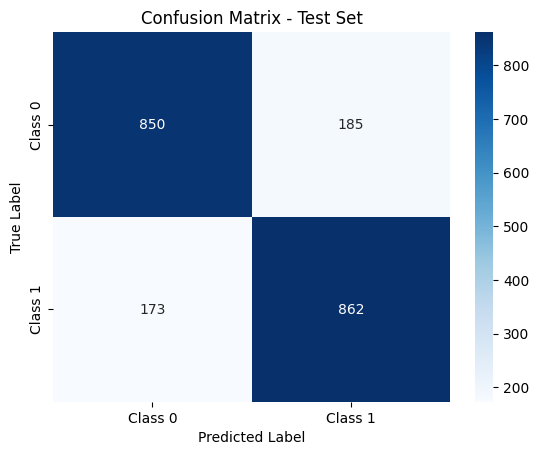

In [51]:
# Confusion matrix
cm = confusion_matrix(y_test, y_test_pred_rf)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Test Set")
plt.show()

The tuned Random Forest model reduced overfitting and achieved 82.8% test accuracy with balanced precision-recall. However, since it averages multiple trees, it may miss complex patterns. We'll now try boosting, which builds models sequentially to improve misclassified cases and see if it potentially enhances performance.

## XGBoost

In [52]:
xgb_model = XGBClassifier()

# Train the model
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred_train = xgb_model.predict(X_train)
y_pred_test = xgb_model.predict(X_test)

# Evaluate model performance
print("Training Accuracy:", accuracy_score(y_train, y_pred_train))
print("\nClassification Report (Train Set):")
print(classification_report(y_train, y_pred_train))

print("\nTest Accuracy:", accuracy_score(y_test, y_pred_test))
print("\nClassification Report (Test Set):")
print(classification_report(y_test, y_pred_test))

Training Accuracy: 0.9452766368688089

Classification Report (Train Set):
              precision    recall  f1-score   support

           0       0.95      0.94      0.94      4139
           1       0.94      0.95      0.95      4139

    accuracy                           0.95      8278
   macro avg       0.95      0.95      0.95      8278
weighted avg       0.95      0.95      0.95      8278


Test Accuracy: 0.8444444444444444

Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.85      0.84      0.84      1035
           1       0.84      0.85      0.84      1035

    accuracy                           0.84      2070
   macro avg       0.84      0.84      0.84      2070
weighted avg       0.84      0.84      0.84      2070



The model is performing well on the training set but shows a gap in test performance, indicating overfitting. We will now fine-tune hyperparameters to enhance its generalization to unseen data.

In [61]:
# Split training data into training & validation set
X_train_sub, X_val, y_train_sub, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

param_grid = {
    'n_estimators': [100, 125, 150],  # Number of boosting rounds
    'max_depth': [3, 5],  # Depth of trees
    'learning_rate': [0.01, 0.1],  # Step size shrinkage to prevent overfitting
    'subsample': [0.8, 1.0],  # Fraction of samples used per tree
    'colsample_bytree': [0.8, 1.0],  # Fraction of features used per tree
    'gamma': [0, 0.1],  # Minimum loss reduction required for further partitioning
    'reg_alpha': [0.1, 0.5],  # L1 regularization (lasso)
    'reg_lambda': [0.1, 0.5]  # L2 regularization (ridge)
}

xgb_grid = GridSearchCV(XGBClassifier(), param_grid=param_grid, cv=5, scoring='accuracy', return_train_score=True)
xgb_grid.fit(X_train, y_train)


# Print best parameters
print("Best Parameters:", xgb_grid.best_params_)

Best Parameters: {'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 125, 'reg_alpha': 0.5, 'reg_lambda': 0.5, 'subsample': 0.8}


In [62]:
# Best model
best_model_xgb = xgb_grid.best_estimator_

# Make predictions
y_train_pred_xgb = best_model_xgb.predict(X_train)
y_test_pred_xgb = best_model_xgb.predict(X_test)

# Evaluate the model
print("Training Accuracy:", accuracy_score(y_train, y_train_pred_xgb))
print("Classification Report (Train):\n", classification_report(y_train, y_train_pred_xgb))
print("Test Accuracy:", accuracy_score(y_test, y_test_pred_xgb))
print("\nClassification Report (Test):\n", classification_report(y_test, y_test_pred_xgb))

Training Accuracy: 0.8859627929451558
Classification Report (Train):
               precision    recall  f1-score   support

           0       0.89      0.88      0.89      4139
           1       0.88      0.89      0.89      4139

    accuracy                           0.89      8278
   macro avg       0.89      0.89      0.89      8278
weighted avg       0.89      0.89      0.89      8278

Test Accuracy: 0.842512077294686

Classification Report (Test):
               precision    recall  f1-score   support

           0       0.85      0.83      0.84      1035
           1       0.84      0.85      0.84      1035

    accuracy                           0.84      2070
   macro avg       0.84      0.84      0.84      2070
weighted avg       0.84      0.84      0.84      2070



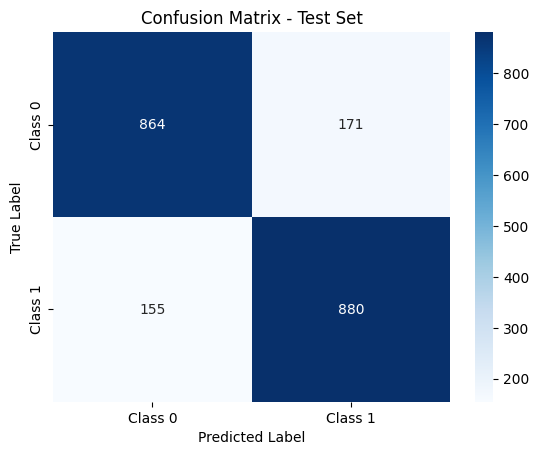

In [63]:
# Confusion matrix
cm = confusion_matrix(y_test, y_test_pred_xgb)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Test Set")
plt.show()

We see a significant improvement in generalization of the model without a significant impact in accuracy on the Test Set. The Precision and Recall for both classes is quite well balanced, this makes the tuned XGBoost model a good candidate for deployment.

# Summary

This project aimed to predict customer churn using machine learning models. We started with Logistic Regression as a baseline, but its performance was limited in capturing complex relationships in the data. We then explored Decision Trees, which overfitted, prompting us to try Random Forest for variance reduction. Finally, we implemented XGBoost, fine-tuning hyperparameters using GridSearchCV to achieve a well-balanced model.

The optimized XGBoost model achieved 88.6% training accuracy and 84.3% test accuracy, with strong precision and recall for both classes. This model effectively identifies potential churners, helping businesses take proactive retention measures. Future improvements could involve extensive feature engineering and testing alternative boosting methods like LightGBM or CatBoost.